# Section A. Model Complexity and Model Selection
## Question 1: KNN Regressor

In [50]:
#libraries
library(reshape2)
library(ggplot2)
library(corrplot)
# Load data: 
train <- read.csv('Task1A_train.csv')
test <- read.csv('Task1A_test.csv')

In [51]:
#dimensions fo train and test data
dim(train)
dim(test)

[1] 42  2

[1] 42  2

In [52]:
index = 1:42
train.data <- train[1] # grab the first 100 records, leave out the species (last column)
train.label <- train[index,2]
test.data <- test[1] # grab the last 50 records, leave out the species (last column)
test.label <- test[index,2]

dim(train.data) # 42 records
dim(test.data) # 42 records

[1] 42  1

[1] 42  1

### Question 1 (I)
Defining KNN regressor function which takes the training data and their labels, the test set, and the size of the neighborhood (K) AND return the regressed values for the test data points based on Manhattan distance.

In [53]:
################################################ KNN function  #####################################################
knn <- function(train.data, train.label, test.data, K){
    # count number of train data
    train.len <- nrow(train.data)
    
    # count number of test data
    test.len <- nrow(test.data)
    
    # calculate manhattan distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # for each row in test data
    for (i in 1:test.len){
        # find its K nearest neighbours from training data
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #calculate the predicted labels the average of the neighbors’ values.
        test.label[i]<- (mean(train.label[nn]))
    }
    
    # return the labels as output
    return (test.label)
}

In [54]:
# let see what is the prediciton of our knn for test samples when K=4
knn(train.data, train.label, test.data, K=4)

[1]  0.7725  0.7725  0.7750  0.7925  0.8475  0.8675  0.9175  0.9975  1.0800
[10]  1.1925  1.2775  1.4325  1.5250  1.6200  1.6875  1.8075  1.9650  2.1825
[19]  2.4975  2.8350  3.1950  3.6000  4.1175  4.4550  4.9500  5.5125  5.8050
[28]  6.2775  6.6150  6.9300  7.3575  7.6950  8.3475  8.7750  9.8100 10.7775
[37] 11.9025 13.2300 14.3100 15.2775 15.2775 15.2775

### Question 1 (II)
Calculating the training and the testing errors for k=1,2....30, using the Task1A_train.csv and Task1A_test.csv datasets provided

In [55]:
# calculate the train and test error rates for K in 1:30 
miss <- data.frame('K'=1:30, 'train'=rep(0,30), 'test'=rep(0,30))
for (k in 1:30){
    miss[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label)^2)
    miss[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)  - test.label)^2)
}

 Ploting the training and the testing errors versus 1/K for K=1,.., 30 in one plot.

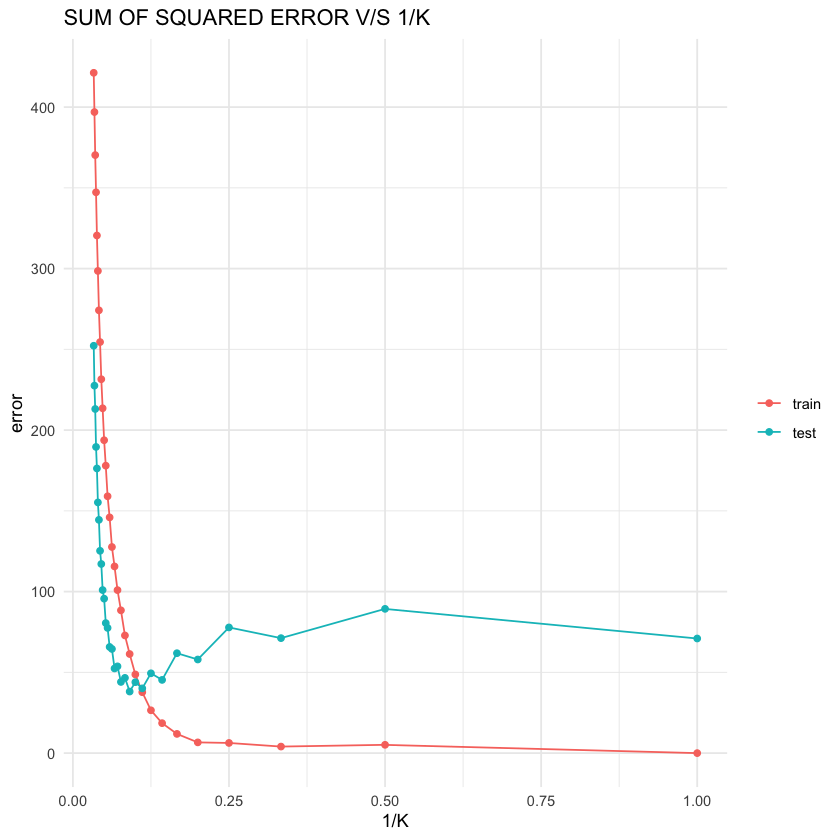

In [56]:
# plot errors (sum of squared error) for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error') # update column names

ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("SUM OF SQUARED ERROR V/S 1/K")

### Question 1 (III)
The optimum value for K in terms of the testing error is 11. At k=11, we have lowest test error. 
As 𝐾 increases,the KNN classifier model becomes more complex.
Low value k, say k=1 corresponds to overfitting. The training data will be perfectly predicted, however, when it comes to test data it has higher error.
With increase in K, the training error increase (increase bias), but the test error decreases till k=12 (approx). 